In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv(r'C:\Users\abreu\AppData\Local\yerba_mate_logger\yerba_mate_logger\yerba_log.csv')

In [98]:
df.head(1)

,date,name,location,gourd_count,body_rank,body_profile,flavor_rank,flavor_profile,cycle_rank,cycle_profile,effects_rank,effects_profile,overall_score
0,2025-04-26,Tucangua,Paraguay,1,4,['Full-bodied'],4,"['Earthy', 'Vegetal', 'Tangy', 'Spicy']",2,Short: < 1 liter,3,"['Energizing', 'Balanced', 'Calming', 'Focus-e...",3.4


In [99]:
gb = df.groupby('name')['overall_score'].mean().sort_values(ascending=False)
ordered_list = gb.keys()

C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\2638556943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb.index, y=gb.values, palette='viridis')


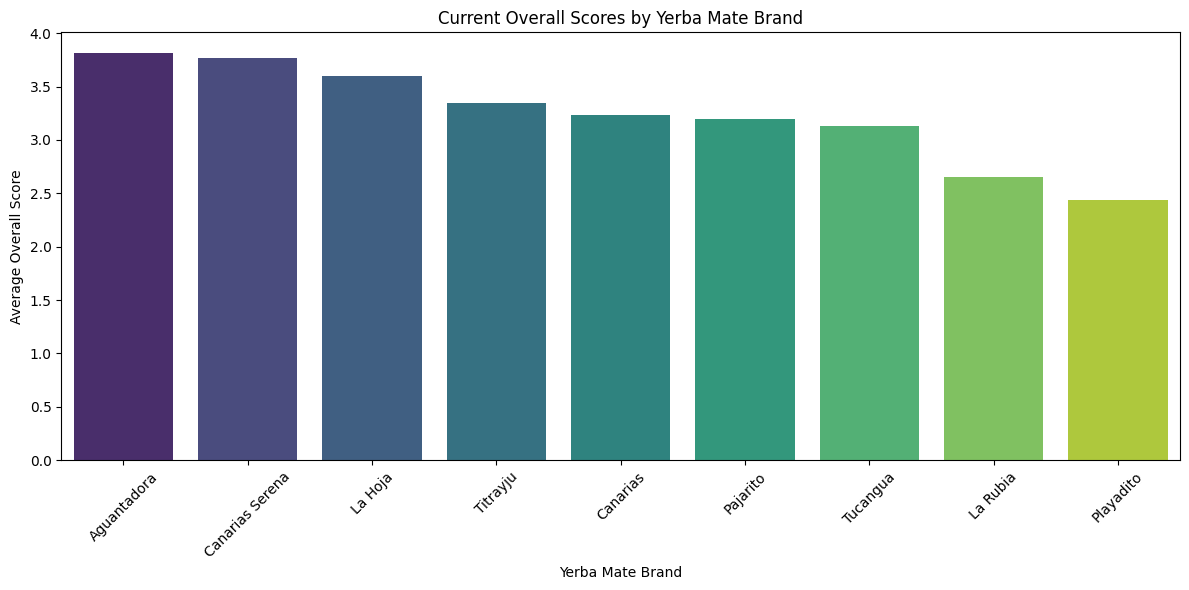

In [100]:
# plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=gb.index, y=gb.values, palette='viridis')
plt.title('Current Overall Scores by Yerba Mate Brand')
plt.xlabel('Yerba Mate Brand')
plt.ylabel('Average Overall Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
df.head(1)

,date,name,location,gourd_count,body_rank,body_profile,flavor_rank,flavor_profile,cycle_rank,cycle_profile,effects_rank,effects_profile,overall_score
0,2025-04-26,Tucangua,Paraguay,1,4,['Full-bodied'],4,"['Earthy', 'Vegetal', 'Tangy', 'Spicy']",2,Short: < 1 liter,3,"['Energizing', 'Balanced', 'Calming', 'Focus-e...",3.4


C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\2281198054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='name', y='flavor_rank', palette='viridis', order=ordered_list)


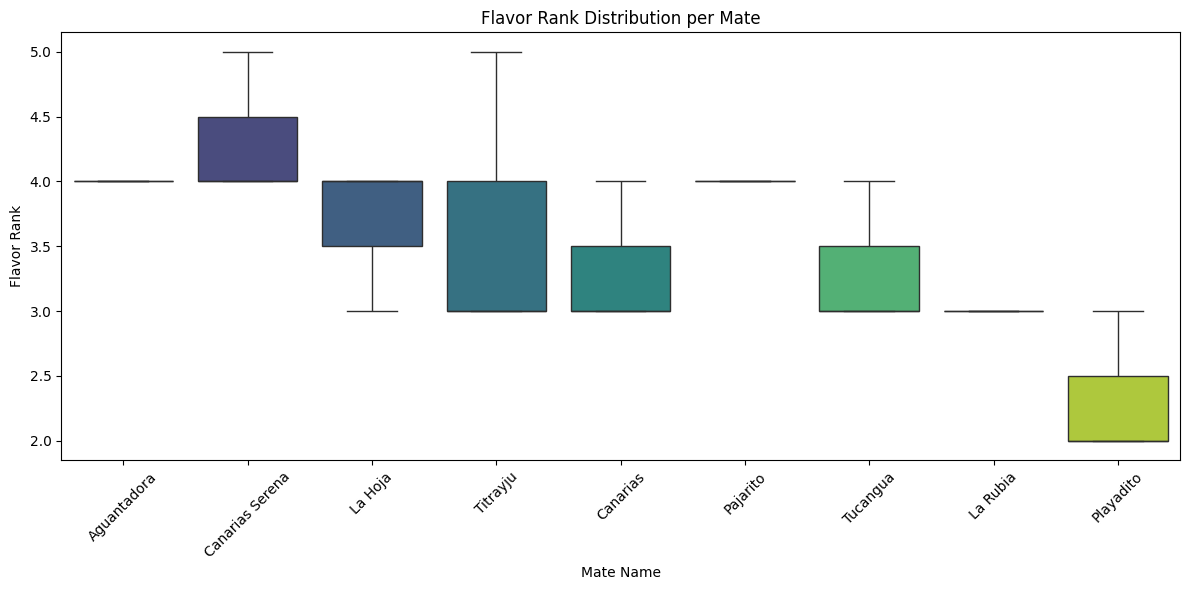

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='name', y='flavor_rank', palette='viridis', order=ordered_list)
plt.title('Flavor Rank Distribution per Mate')
plt.xlabel('Mate Name')
plt.ylabel('Flavor Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\3152827579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='name', y='effects_rank', palette='viridis', order=ordered_list)


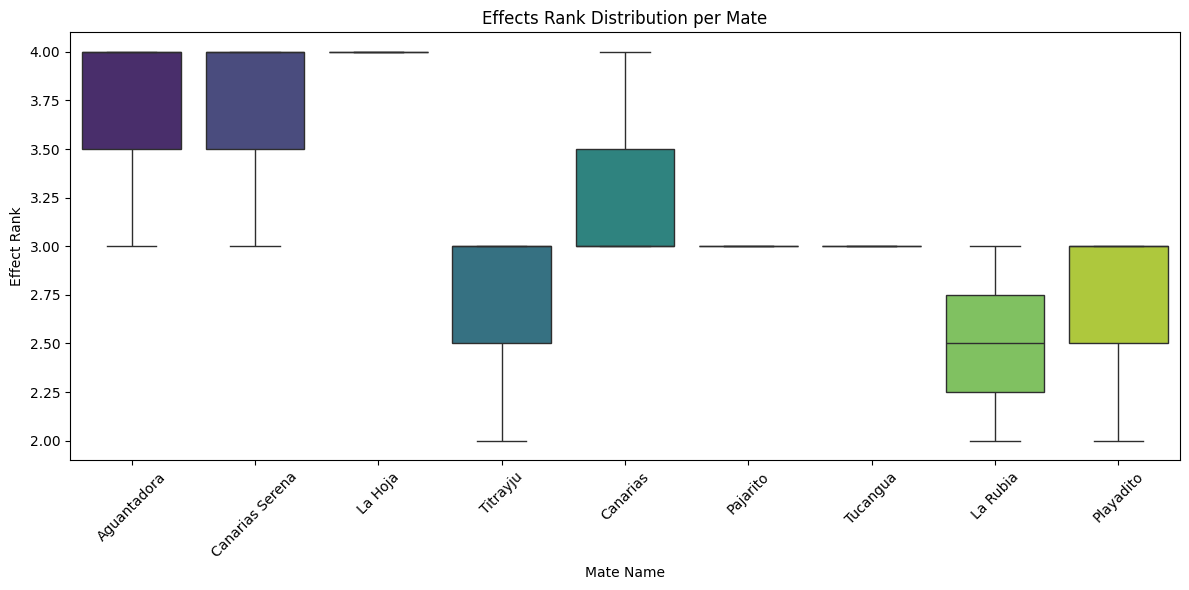

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='name', y='effects_rank', palette='viridis', order=ordered_list)
plt.title('Effects Rank Distribution per Mate')
plt.xlabel('Mate Name')
plt.ylabel('Effect Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\746308014.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_flavors)
C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\746308014.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_flavors)
C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\746308014.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_flavors)
C

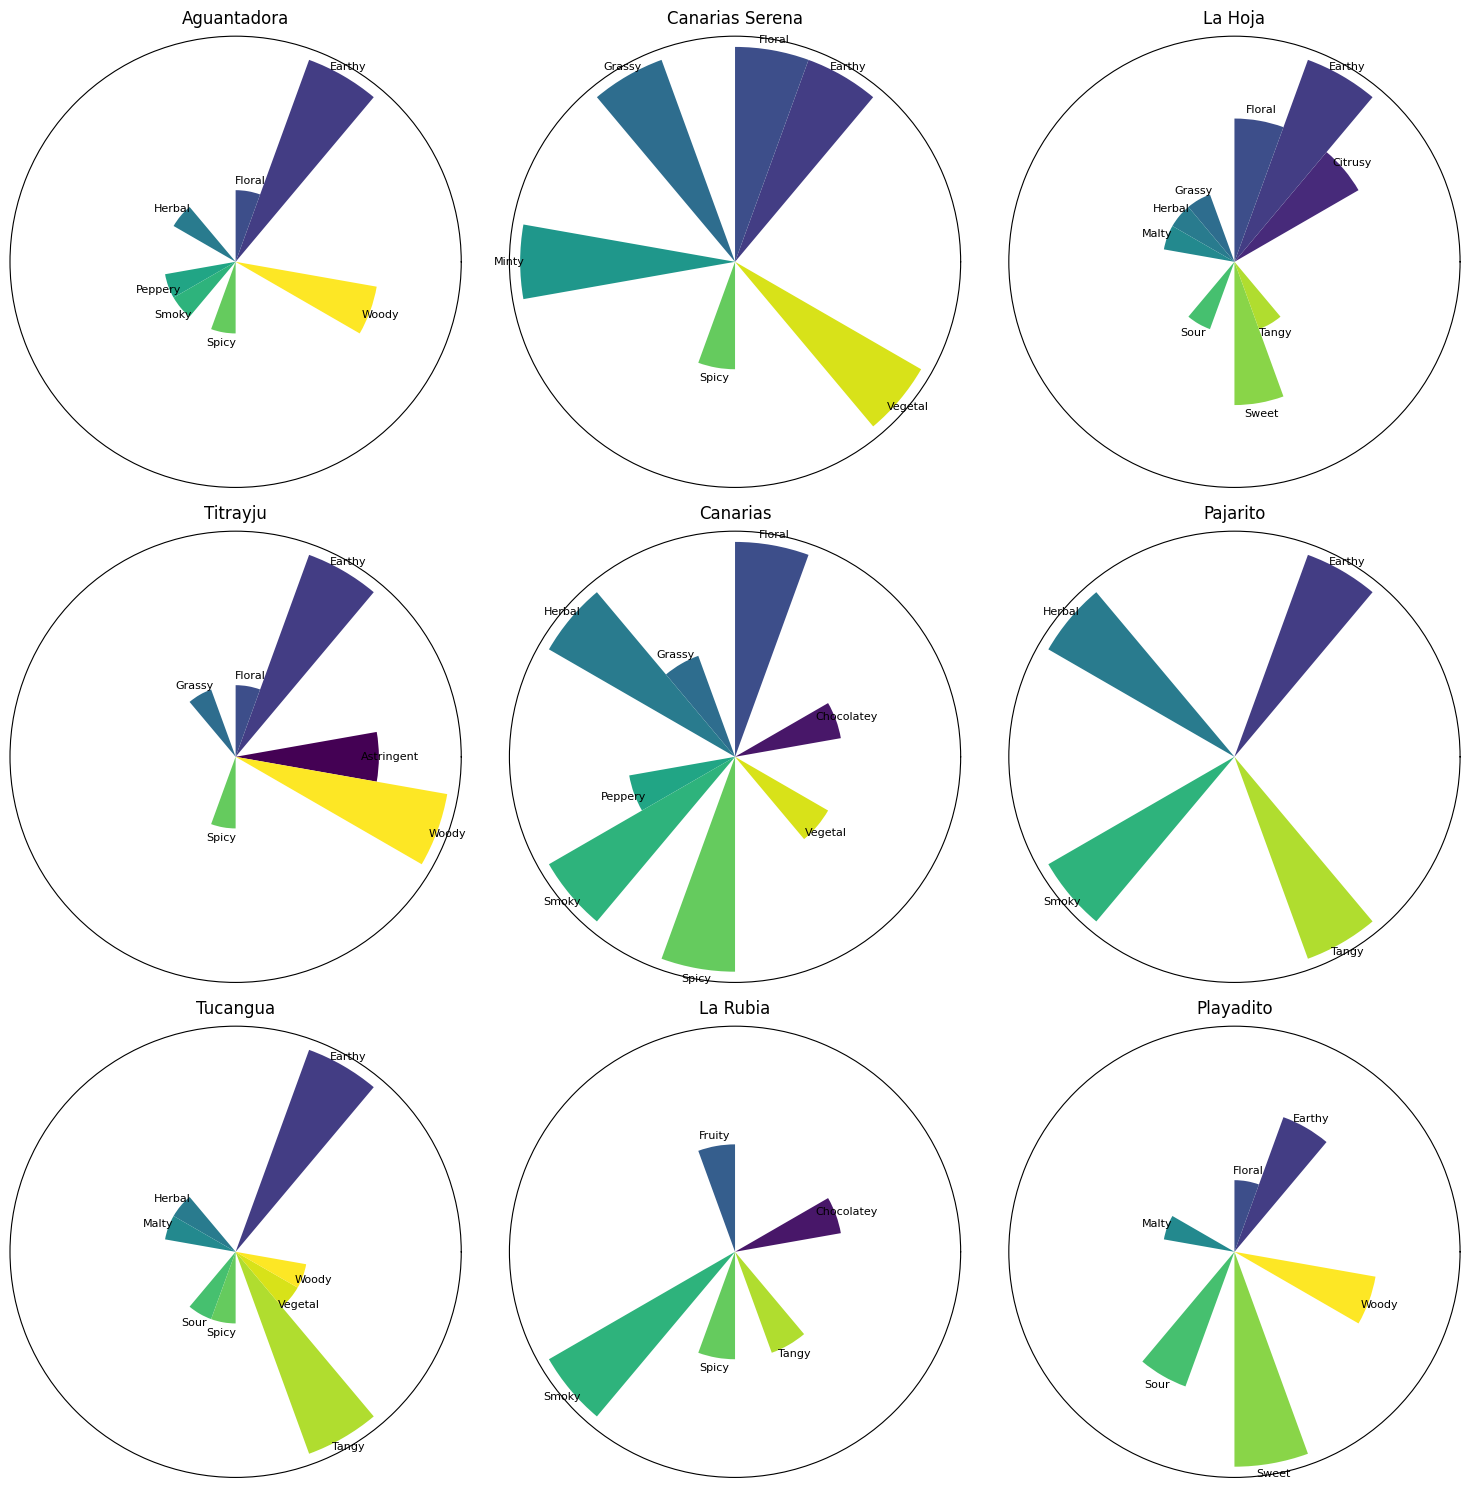

In [104]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math


def plot_polar_profiles(df, profile_col):
    df[profile_col] = df[profile_col].apply(ast.literal_eval)
    profiles = df.explode(profile_col)
    counts = profiles.groupby(['name', profile_col]).size().reset_index(name='count')
    counts_sorted = counts.sort_values(['name', 'count'], ascending=[True, False])
    mates = ordered_list
    profile_list = sorted(profiles[profile_col].unique())


    n_mates = len(mates)
    n_cols = 3
    n_rows = math.ceil(n_mates / n_cols)

    # Figure
    fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': 'polar'}, figsize=(n_cols*5, n_rows*5))
    axes = axes.flatten()

    for idx, mate in enumerate(mates):
        ax = axes[idx]
        
        # Subset and align to all flavors
        subset = counts_sorted[counts_sorted['name'] == mate]
        subset = pd.DataFrame({profile_col: profile_list}).merge(subset, on=profile_col, how='left')
        subset['count'] = subset['count'].fillna(0)
        
        # Polar coordinates
        num_flavors = len(profile_list)
        theta = np.linspace(0.0, 2 * np.pi, num_flavors, endpoint=False)
        radii = subset['count'].values
        width = 2 * np.pi / num_flavors

        # Colors
        cmap = cm.get_cmap('viridis', num_flavors)
        colors = [cmap(i) for i in range(num_flavors)]
        
        # Bars
        bars = ax.bar(theta, radii, width=width, bottom=0.0, color=colors)

        # Add flavor labels
        for angle, radius, label in zip(theta, radii, subset[profile_col]):
            if radius > 0:
                ax.text(
                    angle, 
                    radius + max(radii)*0.05, 
                    label, 
                    ha='center', 
                    va='center', 
                    fontsize=8
                )

        ax.set_title(mate, va='bottom')
        ax.set_xticks([])
        ax.set_yticks([])

    # Turn off extra empty plots
    for i in range(idx+1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    return plt.show()

plot_polar_profiles(df, 'flavor_profile')


C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\746308014.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_flavors)
C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\746308014.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_flavors)
C:\Users\abreu\AppData\Local\Temp\ipykernel_6992\746308014.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_flavors)
C

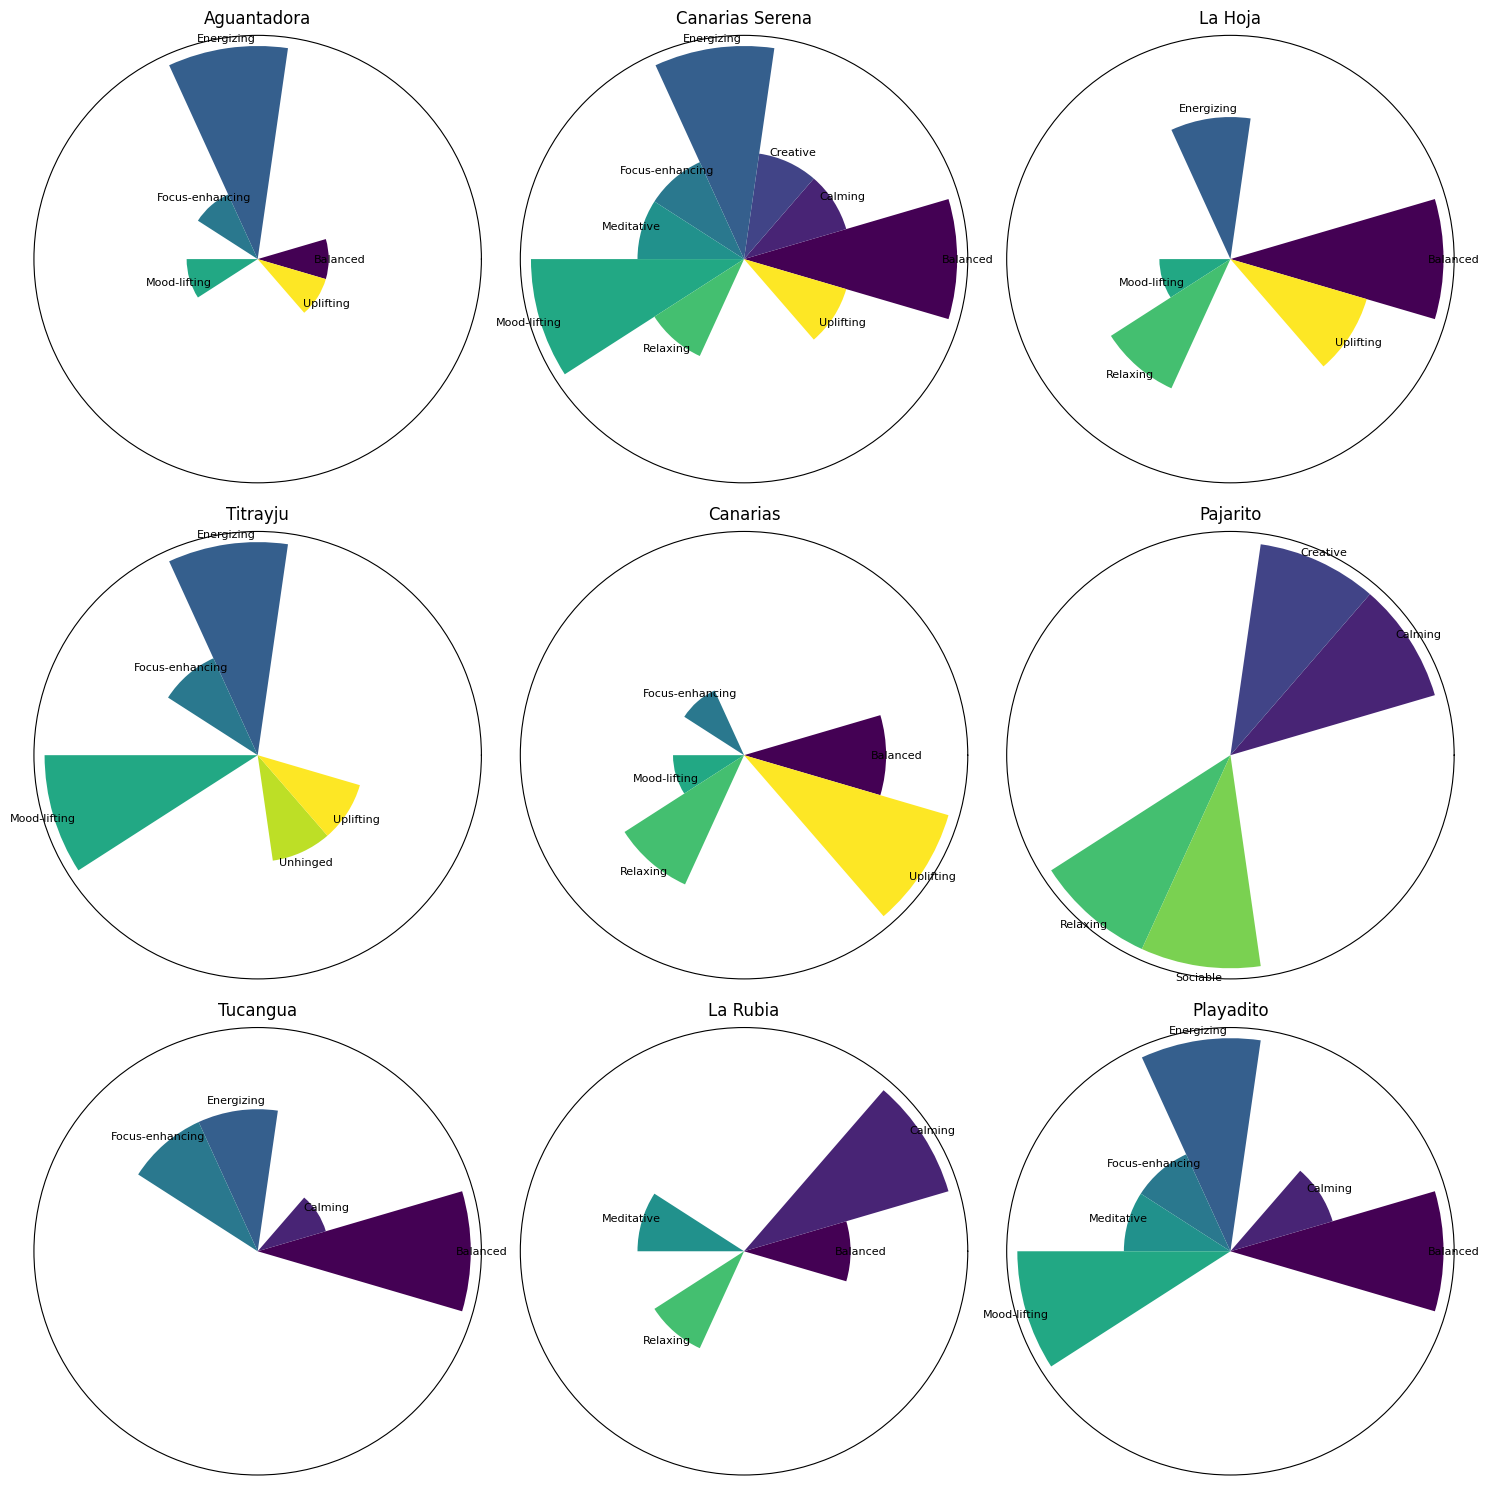

In [105]:
plot_polar_profiles(df, 'effects_profile')